Este script fue creado para añadir las coordenadas a los dataset de las 3 estaciones, refinar la limpieza de datos, calcular ciclos medios anuales y diurnos de la variable temperatua para la descripción climatológica de las zonas de estudio y para la detección de anomalías.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**BARBOSA: ESTACIÓN 82 - I.E MANUEL JOSÉ CAICEDO**

In [36]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/82_dataset_completo.csv")
df['latitud'] = 	6.434950
df['longitud'] = -75.326646

print(df.head())
print(df.tail())


   codigo           fecha_hora  temperatura  calidad  latitud   longitud
0      82  2014-01-01 00:00:33         19.9        1  6.43495 -75.326646
1      82  2014-01-01 00:01:33         20.0        1  6.43495 -75.326646
2      82  2014-01-01 00:02:33         20.0        1  6.43495 -75.326646
3      82  2014-01-01 00:03:33         20.0        1  6.43495 -75.326646
4      82  2014-01-01 00:04:33         20.0        1  6.43495 -75.326646
         codigo           fecha_hora  temperatura  calidad  latitud   longitud
5513627      82  2024-12-31 23:55:00         18.6        1  6.43495 -75.326646
5513628      82  2024-12-31 23:56:00         18.5        1  6.43495 -75.326646
5513629      82  2024-12-31 23:57:00         18.5        1  6.43495 -75.326646
5513630      82  2024-12-31 23:58:00         18.5        1  6.43495 -75.326646
5513631      82  2024-12-31 23:59:00         18.5        1  6.43495 -75.326646



**LIMPIEZA DE DATOS**

In [37]:
df_clean = df.drop_duplicates()
df_clean = df_clean.dropna(subset=['temperatura', 'latitud', 'longitud'])
df_clean.to_csv("82_datos_meteorologicos_limpios.csv", index=False)

print("Archivo guardado como '82_datos_meteorologicos_limpios.csv'")

Archivo guardado como '82_datos_meteorologicos_limpios.csv'


In [38]:
print(df.head())
print(df.tail())


   codigo           fecha_hora  temperatura  calidad  latitud   longitud
0      82  2014-01-01 00:00:33         19.9        1  6.43495 -75.326646
1      82  2014-01-01 00:01:33         20.0        1  6.43495 -75.326646
2      82  2014-01-01 00:02:33         20.0        1  6.43495 -75.326646
3      82  2014-01-01 00:03:33         20.0        1  6.43495 -75.326646
4      82  2014-01-01 00:04:33         20.0        1  6.43495 -75.326646
         codigo           fecha_hora  temperatura  calidad  latitud   longitud
5513627      82  2024-12-31 23:55:00         18.6        1  6.43495 -75.326646
5513628      82  2024-12-31 23:56:00         18.5        1  6.43495 -75.326646
5513629      82  2024-12-31 23:57:00         18.5        1  6.43495 -75.326646
5513630      82  2024-12-31 23:58:00         18.5        1  6.43495 -75.326646
5513631      82  2024-12-31 23:59:00         18.5        1  6.43495 -75.326646


In [39]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/82_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

df['codigo'] = 82
df['latitud'] = 6.434950
df['longitud'] = -75.326646

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513629 entries, 0 to 5513628
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   codigo       int64         
 1   fecha_hora   datetime64[ns]
 2   temperatura  float64       
 3   calidad      int64         
 4   latitud      float64       
 5   longitud     float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 252.4 MB
None
          codigo                     fecha_hora   temperatura       calidad  \
count  5513629.0                        5513629  5.513629e+06  5.513629e+06   
mean        82.0  2019-07-30 11:43:08.658716416  1.459414e+01  9.712671e+00   
min         82.0            2014-01-01 00:00:33 -9.990000e+02  1.000000e+00   
25%         82.0            2016-11-27 20:17:23  1.880000e+01  1.000000e+00   
50%         82.0            2019-08-15 20:08:00  2.070000e+01  1.000000e+00   
75%         82.0            2022-03-30 02:17:00  2.370000e+01  1.000000e+0

**FILTRADO Y LIMPIEZA**

In [40]:
df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]


**CICLO MEDIO ANUAL**

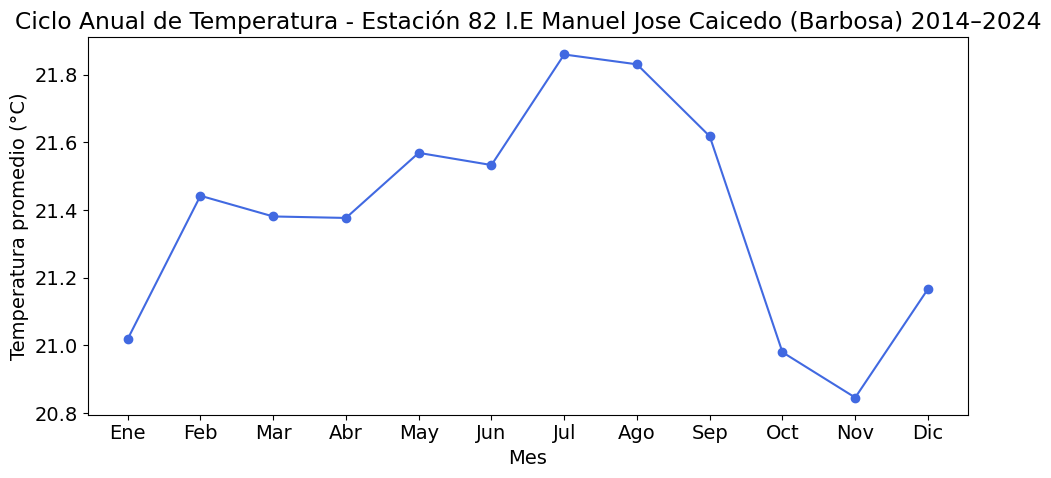

In [41]:
import matplotlib.pyplot as plt
df['mes'] = df['fecha_hora'].dt.month

ciclo_mensual = df.groupby('mes')['temperatura'].mean()

plt.figure(figsize=(10, 5))
ciclo_mensual.plot(marker='o', color='royalblue')
plt.title("Ciclo Anual de Temperatura - Estación 82 I.E Manuel Jose Caicedo (Barbosa) 2014–2024")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(False)
plt.tight_layout()
plt.show()


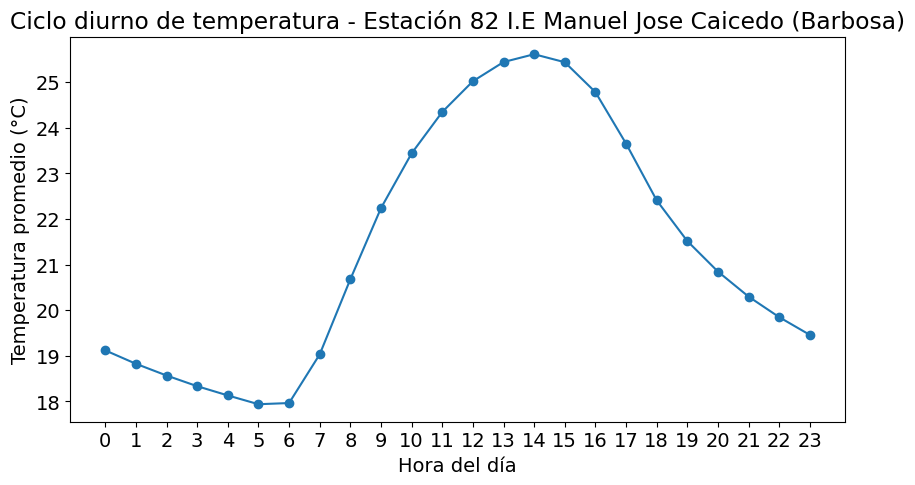

In [42]:
df['hora'] = df['fecha_hora'].dt.hour
ciclo_diurno = df.groupby('hora')['temperatura'].mean()

ciclo_diurno.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Ciclo diurno de temperatura - Estación 82 I.E Manuel Jose Caicedo (Barbosa)")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura promedio (°C)")
plt.grid(False)
plt.xticks(range(0,24))
plt.show()


**DETECCIÓN DE ANOMALÍAS Z-SCORE**

In [43]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/82_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

df_mensual = df.groupby(['año', 'mes'])['temperatura'].mean().reset_index()

df_mensual['z'] = zscore(df_mensual['temperatura'])

anomalías = df_mensual[df_mensual['z'].abs() > 2.5]

print("Anomalías detectadas por mes (2014–2024):")
print(anomalías)

anomalías.to_csv("anomalías_mensuales.csv", index=False)


Anomalías detectadas por mes (2014–2024):
      año  mes  temperatura         z
20   2015    9    23.217698  2.622335
122  2024    3    23.237177  2.650624


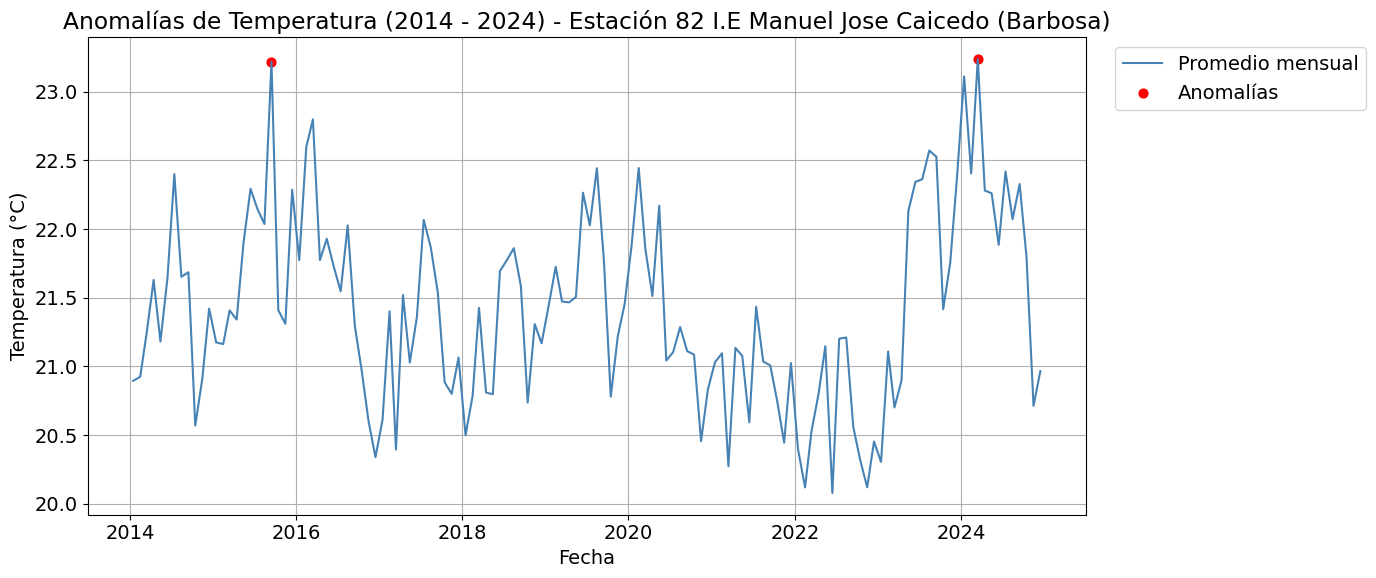

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/82_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

df_mensual = df.groupby(['año', 'mes'])['temperatura'].mean().reset_index()

df_mensual['fecha'] = pd.to_datetime(df_mensual['año'].astype(str) + '-' + df_mensual['mes'].astype(str) + '-15')

df_mensual['z'] = zscore(df_mensual['temperatura'])

anomalías = df_mensual[df_mensual['z'].abs() > 2.5]

plt.figure(figsize=(14, 6))
plt.plot(df_mensual['fecha'], df_mensual['temperatura'], label='Promedio mensual', color='steelblue')
plt.scatter(anomalías['fecha'], anomalías['temperatura'], color='red', s=40, label='Anomalías')
plt.title("Anomalías de Temperatura (2014 - 2024) - Estación 82 I.E Manuel Jose Caicedo (Barbosa)")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


**CALDAS: ESTACIÓN 105 - PARQUE 3 AGUAS**

In [45]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/105_dataset_completo.csv")

df['latitud'] = 	6.096280
df['longitud'] = -75.635360

print(df.head())
print(df.tail())

   codigo           fecha_hora  temperatura  calidad  latitud  longitud
0     105  2014-01-16 00:00:29         18.2        1  6.09628 -75.63536
1     105  2014-01-16 00:01:29         18.2        1  6.09628 -75.63536
2     105  2014-01-16 00:02:29         18.1        1  6.09628 -75.63536
3     105  2014-01-16 00:03:29         18.1        1  6.09628 -75.63536
4     105  2014-01-16 00:04:29         18.1        1  6.09628 -75.63536
         codigo           fecha_hora  temperatura  calidad  latitud  longitud
5589914     105  2024-12-31 23:55:00         17.8        1  6.09628 -75.63536
5589915     105  2024-12-31 23:56:00         17.8        1  6.09628 -75.63536
5589916     105  2024-12-31 23:57:00         17.8        1  6.09628 -75.63536
5589917     105  2024-12-31 23:58:00         17.8        1  6.09628 -75.63536
5589918     105  2024-12-31 23:59:00         17.8        1  6.09628 -75.63536


**LIMPIEZA DE DATOS**

In [46]:
df_clean = df.drop_duplicates()

df_clean = df_clean.dropna(subset=['temperatura', 'latitud', 'longitud'])

df_clean.to_csv("105_datos_meteorologicos_limpios.csv", index=False)

print("Archivo guardado como '105_datos_meteorologicos_limpios.csv'")

Archivo guardado como '105_datos_meteorologicos_limpios.csv'


**FILTRADO Y LIMPIEZA**

In [47]:
df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

**CICLO MEDIO ANUAL**

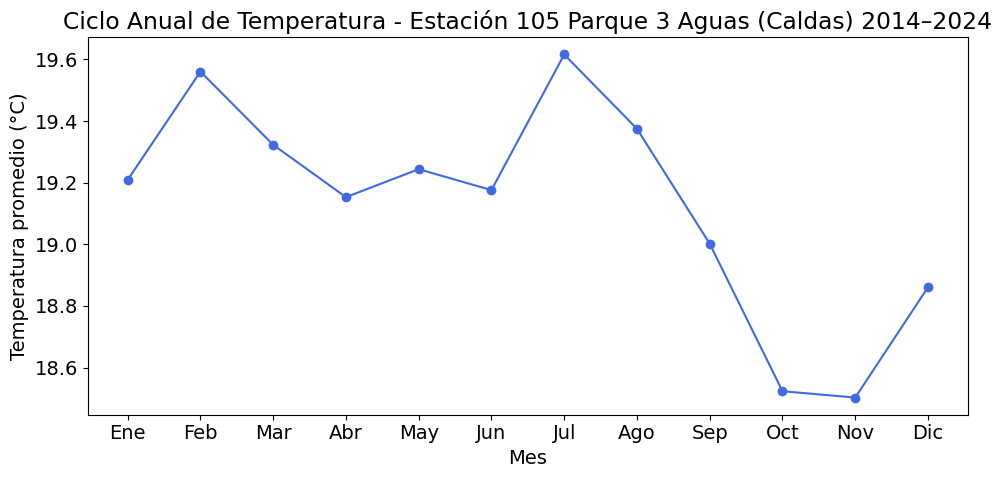

In [48]:
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
df['mes'] = df['fecha_hora'].dt.month

ciclo_mensual = df.groupby('mes')['temperatura'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ciclo_mensual.plot(marker='o', color='royalblue')
plt.title("Ciclo Anual de Temperatura - Estación 105 Parque 3 Aguas (Caldas) 2014–2024")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(False)
plt.tight_layout()
plt.show()


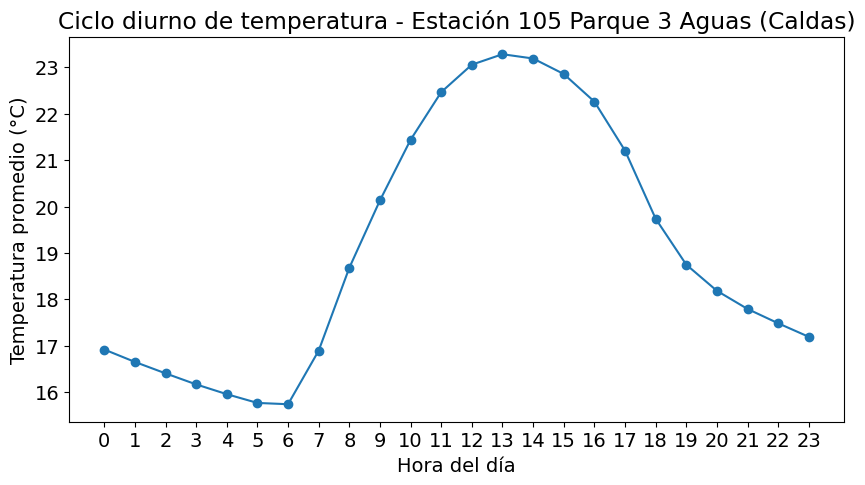

In [49]:
df['hora'] = df['fecha_hora'].dt.hour
ciclo_diurno = df.groupby('hora')['temperatura'].mean()

ciclo_diurno.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Ciclo diurno de temperatura - Estación 105 Parque 3 Aguas (Caldas)")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura promedio (°C)")
plt.grid(False)
plt.xticks(range(0,24))
plt.show()


**DETECCIÓN DE ANOMALÍAS Z-SCORE**

In [50]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/105_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

df_mensual = df.groupby(['año', 'mes'])['temperatura'].mean().reset_index()

df_mensual['z'] = zscore(df_mensual['temperatura'])

anomalías = df_mensual[df_mensual['z'].abs() > 2.5]

print("Anomalías detectadas por mes (2014–2024):")
print(anomalías)

anomalías.to_csv("anomalías_mensuales.csv", index=False)


Anomalías detectadas por mes (2014–2024):
      año  mes  temperatura         z
25   2016    2    21.091335  2.512932
122  2024    3    21.651125  3.236636
123  2024    4    21.081611  2.500360


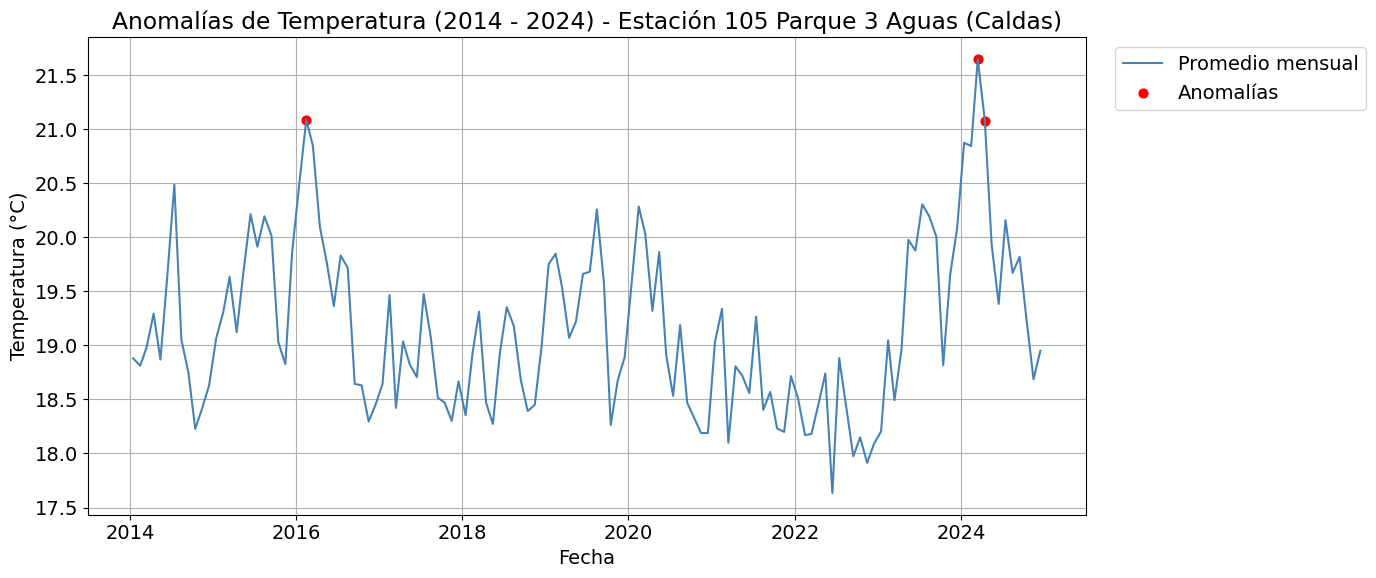

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/105_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

df_mensual = df.groupby(['año', 'mes'])['temperatura'].mean().reset_index()

df_mensual['fecha'] = pd.to_datetime(df_mensual['año'].astype(str) + '-' + df_mensual['mes'].astype(str) + '-15')

df_mensual['z'] = zscore(df_mensual['temperatura'])

anomalías = df_mensual[df_mensual['z'].abs() > 2.5]

plt.figure(figsize=(14, 6))
plt.plot(df_mensual['fecha'], df_mensual['temperatura'], label='Promedio mensual', color='steelblue')
plt.scatter(anomalías['fecha'], anomalías['temperatura'], color='red', s=40, label='Anomalías')
plt.title("Anomalías de Temperatura (2014 - 2024) - Estación 105 Parque 3 Aguas (Caldas)")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


**MEDELLÍN: ESTACIÓN 202 - AMVA**

In [52]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/202_dataset_completo.csv")
df['latitud'] = 	6.242238
df['longitud'] = -75.574031

print(df.head())
print(df.tail())

   codigo           fecha_hora  temperatura  calidad   latitud   longitud
0     202  2014-01-01 00:00:26         20.6        1  6.242238 -75.574031
1     202  2014-01-01 00:01:26         20.6        1  6.242238 -75.574031
2     202  2014-01-01 00:02:26         20.6        1  6.242238 -75.574031
3     202  2014-01-01 00:03:26         20.5        1  6.242238 -75.574031
4     202  2014-01-01 00:04:26         20.5        1  6.242238 -75.574031
         codigo           fecha_hora  temperatura  calidad   latitud  \
5734406     202  2024-12-31 23:55:00         19.7        1  6.242238   
5734407     202  2024-12-31 23:56:00         19.7        1  6.242238   
5734408     202  2024-12-31 23:57:00         19.7        1  6.242238   
5734409     202  2024-12-31 23:58:00         19.7        1  6.242238   
5734410     202  2024-12-31 23:59:00         19.7        1  6.242238   

          longitud  
5734406 -75.574031  
5734407 -75.574031  
5734408 -75.574031  
5734409 -75.574031  
5734410 -75.574031

**LIMPIEZA DE DATOS**

In [53]:
df_clean = df.drop_duplicates()

df_clean = df_clean.dropna(subset=['temperatura', 'latitud', 'longitud'])

df_clean.to_csv("202_datos_meteorologicos_limpios.csv", index=False)

print("Archivo guardado como '202_datos_meteorologicos_limpios.csv'")

Archivo guardado como '202_datos_meteorologicos_limpios.csv'


**FILTRADO Y LIMPIEZA**

In [54]:
df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

**CICLO MEDIO ANUAL**

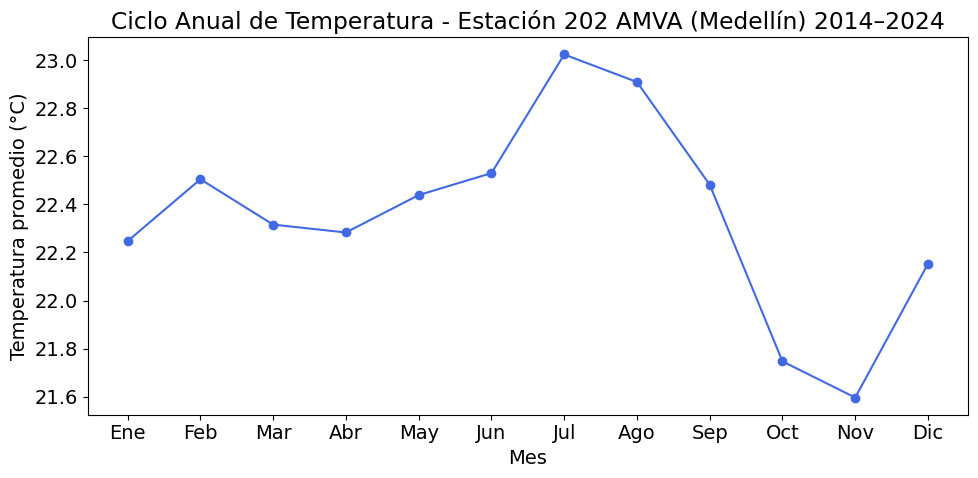

In [55]:
import matplotlib.pyplot as plt

df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
df['mes'] = df['fecha_hora'].dt.month

ciclo_mensual = df.groupby('mes')['temperatura'].mean()

plt.figure(figsize=(10, 5))
ciclo_mensual.plot(marker='o', color='royalblue')
plt.title("Ciclo Anual de Temperatura - Estación 202 AMVA (Medellín) 2014–2024")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(False)
plt.tight_layout()
plt.show()


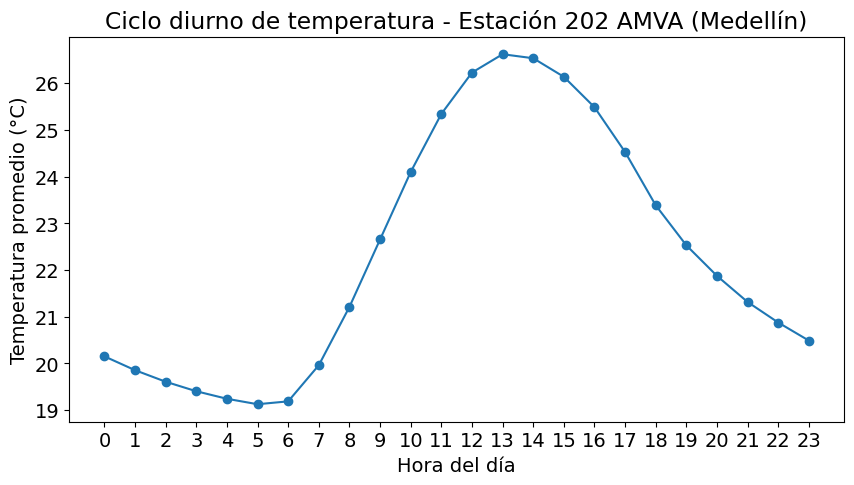

In [56]:
df['hora'] = df['fecha_hora'].dt.hour
ciclo_diurno = df.groupby('hora')['temperatura'].mean()

ciclo_diurno.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Ciclo diurno de temperatura - Estación 202 AMVA (Medellín)")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura promedio (°C)")
plt.grid(False)
plt.xticks(range(0,24))
plt.show()


**DETECCIÓN DE ANOMALÍAS Z-SCORE**

In [57]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/202_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

df_mensual = df.groupby(['año', 'mes'])['temperatura'].mean().reset_index()

df_mensual['z'] = zscore(df_mensual['temperatura'])

anomalías = df_mensual[df_mensual['z'].abs() > 2.5]

print("Anomalías detectadas por mes (2014–2024):")
print(anomalías)

anomalías.to_csv("anomalías_mensuales.csv", index=False)


Anomalías detectadas por mes (2014–2024):
      año  mes  temperatura         z
122  2024    3    24.440306  2.549689


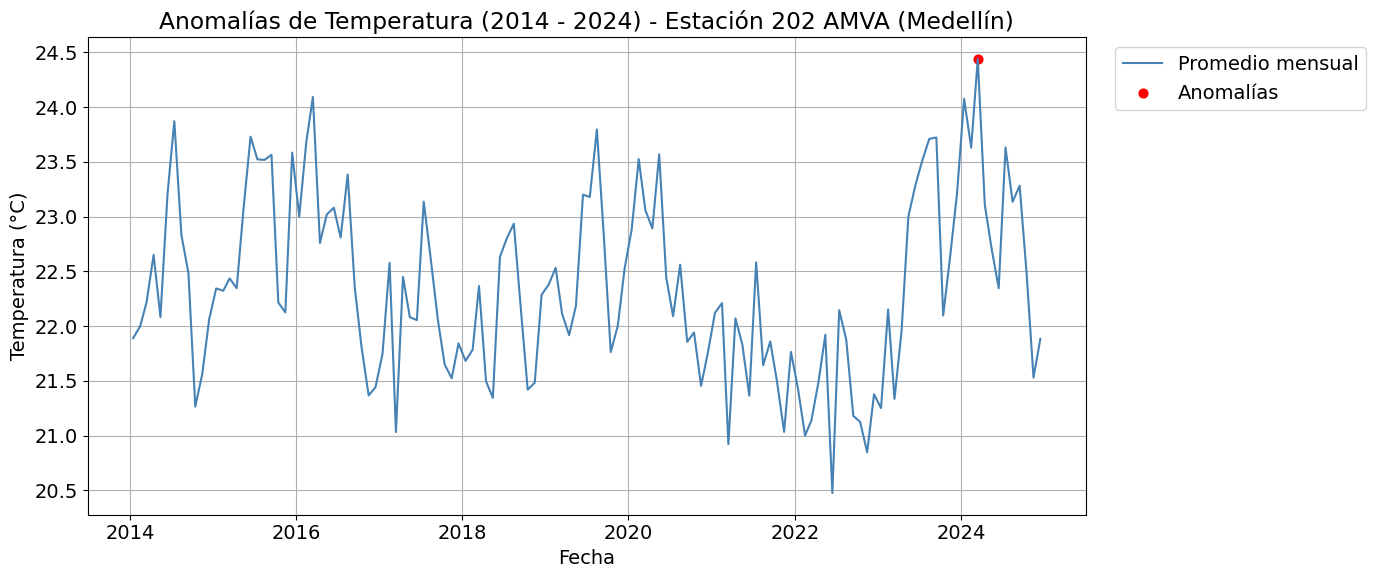

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/202_datos_meteorologicos_limpios.csv")
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
df = df[(df['temperatura'] > -10) & (df['temperatura'] < 50)]
df = df[(df['calidad'] >= 1) & (df['calidad'] <= 100)]

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

df_mensual = df.groupby(['año', 'mes'])['temperatura'].mean().reset_index()

df_mensual['fecha'] = pd.to_datetime(df_mensual['año'].astype(str) + '-' + df_mensual['mes'].astype(str) + '-15')

df_mensual['z'] = zscore(df_mensual['temperatura'])

anomalías = df_mensual[df_mensual['z'].abs() > 2.5]

plt.figure(figsize=(14, 6))
plt.plot(df_mensual['fecha'], df_mensual['temperatura'], label='Promedio mensual', color='steelblue')
plt.scatter(anomalías['fecha'], anomalías['temperatura'], color='red', s=40, label='Anomalías')
plt.title("Anomalías de Temperatura (2014 - 2024) - Estación 202 AMVA (Medellín)")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


   codigo           fecha_hora  temperatura  calidad  latitud   longitud
0      82  2014-01-01 00:00:33         19.9        1  6.43495 -75.326646
1      82  2014-01-01 00:01:33         20.0        1  6.43495 -75.326646
2      82  2014-01-01 00:02:33         20.0        1  6.43495 -75.326646
3      82  2014-01-01 00:03:33         20.0        1  6.43495 -75.326646
4      82  2014-01-01 00:04:33         20.0        1  6.43495 -75.326646
         codigo           fecha_hora  temperatura  calidad  latitud   longitud
5513627      82  2024-12-31 23:55:00         18.6        1  6.43495 -75.326646
5513628      82  2024-12-31 23:56:00         18.5        1  6.43495 -75.326646
5513629      82  2024-12-31 23:57:00         18.5        1  6.43495 -75.326646
5513630      82  2024-12-31 23:58:00         18.5        1  6.43495 -75.326646
5513631      82  2024-12-31 23:59:00         18.5        1  6.43495 -75.326646
Archivo guardado como '82_datos_meteorologicos_limpios.csv'
<class 'pandas.core.frame.Da

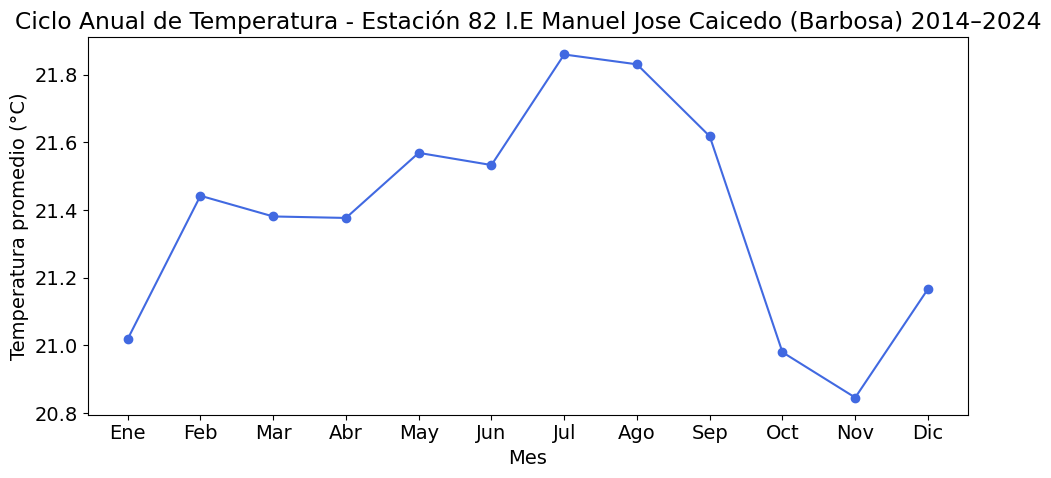

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df_82 = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/82_dataset_completo.csv")
df_82['latitud'] = 	6.434950
df_82['longitud'] = -75.326646

print(df_82.head())
print(df_82.tail())

df_clean_82 = df_82.drop_duplicates()
df_clean_82 = df_clean_82.dropna(subset=['temperatura', 'latitud', 'longitud'])
df_clean_82.to_csv("82_datos_meteorologicos_limpios.csv", index=False)

print("Archivo guardado como '82_datos_meteorologicos_limpios.csv'")

df_82 = pd.read_csv("82_datos_meteorologicos_limpios.csv")
df_82['fecha_hora'] = pd.to_datetime(df_82['fecha_hora'], errors='coerce')

df_82['codigo'] = 82
df_82['latitud'] = 6.434950
df_82['longitud'] = -75.326646

print(df_82.info())
print(df_82.describe())

df_82 = df_82[(df_82['temperatura'] > -10) & (df_82['temperatura'] < 50)]
df_82 = df_82[(df_82['calidad'] >= 1) & (df_82['calidad'] <= 100)]

df_82['mes'] = df_82['fecha_hora'].dt.month
ciclo_mensual_82 = df_82.groupby('mes')['temperatura'].mean()

df_82['hora'] = df_82['fecha_hora'].dt.hour
ciclo_diurno_82 = df_82.groupby('hora')['temperatura'].mean()

plt.figure(figsize=(10, 5))
ciclo_mensual_82.plot(marker='o', color='royalblue')
plt.title("Ciclo Anual de Temperatura - Estación 82 I.E Manuel Jose Caicedo (Barbosa) 2014–2024")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(False)
plt.tight_layout()
plt.show()

   codigo           fecha_hora  temperatura  calidad  latitud  longitud
0     105  2014-01-16 00:00:29         18.2        1  6.09628 -75.63536
1     105  2014-01-16 00:01:29         18.2        1  6.09628 -75.63536
2     105  2014-01-16 00:02:29         18.1        1  6.09628 -75.63536
3     105  2014-01-16 00:03:29         18.1        1  6.09628 -75.63536
4     105  2014-01-16 00:04:29         18.1        1  6.09628 -75.63536
         codigo           fecha_hora  temperatura  calidad  latitud  longitud
5589914     105  2024-12-31 23:55:00         17.8        1  6.09628 -75.63536
5589915     105  2024-12-31 23:56:00         17.8        1  6.09628 -75.63536
5589916     105  2024-12-31 23:57:00         17.8        1  6.09628 -75.63536
5589917     105  2024-12-31 23:58:00         17.8        1  6.09628 -75.63536
5589918     105  2024-12-31 23:59:00         17.8        1  6.09628 -75.63536
Archivo guardado como '105_datos_meteorologicos_limpios.csv'
<class 'pandas.core.frame.DataFrame'>
R

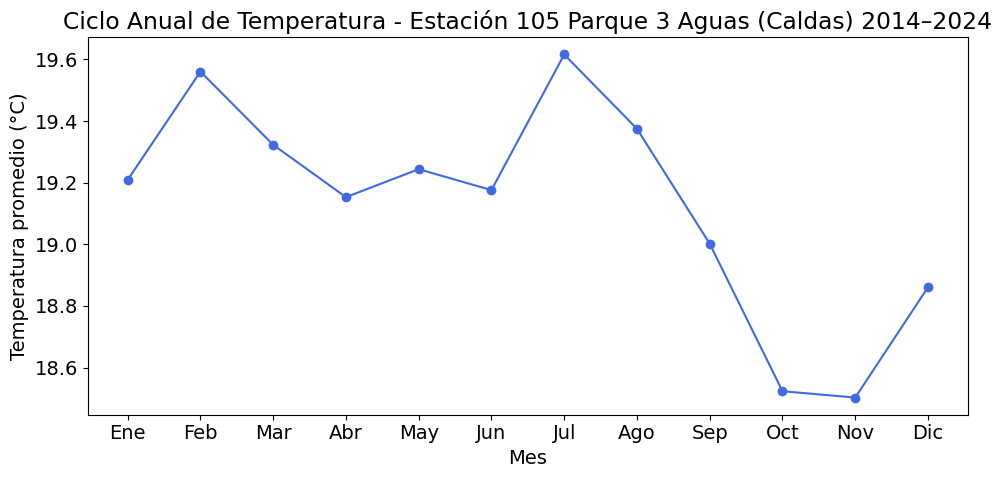

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df_105 = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/105_dataset_completo.csv")

df_105['latitud'] = 	6.096280
df_105['longitud'] = -75.635360

print(df_105.head())
print(df_105.tail())

df_clean_105 = df_105.drop_duplicates()
df_clean_105 = df_clean_105.dropna(subset=['temperatura', 'latitud', 'longitud'])
df_clean_105.to_csv("105_datos_meteorologicos_limpios.csv", index=False)

print("Archivo guardado como '105_datos_meteorologicos_limpios.csv'")

df_105 = pd.read_csv("105_datos_meteorologicos_limpios.csv")
df_105['fecha_hora'] = pd.to_datetime(df_105['fecha_hora'], errors='coerce')

df_105['codigo'] = 105
df_105['latitud'] = 6.096280
df_105['longitud'] = -75.635360

print(df_105.info())
print(df_105.describe())

df_105 = df_105[(df_105['temperatura'] > -10) & (df_105['temperatura'] < 50)]
df_105 = df_105[(df_105['calidad'] >= 1) & (df_105['calidad'] <= 100)]

df_105['mes'] = df_105['fecha_hora'].dt.month
ciclo_mensual_105 = df_105.groupby('mes')['temperatura'].mean()

df_105['hora'] = df_105['fecha_hora'].dt.hour
ciclo_diurno_105 = df_105.groupby('hora')['temperatura'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ciclo_mensual_105.plot(marker='o', color='royalblue')
plt.title("Ciclo Anual de Temperatura - Estación 105 Parque 3 Aguas (Caldas) 2014–2024")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(False)
plt.tight_layout()
plt.show()

   codigo           fecha_hora  temperatura  calidad   latitud   longitud
0     202  2014-01-01 00:00:26         20.6        1  6.242238 -75.574031
1     202  2014-01-01 00:01:26         20.6        1  6.242238 -75.574031
2     202  2014-01-01 00:02:26         20.6        1  6.242238 -75.574031
3     202  2014-01-01 00:03:26         20.5        1  6.242238 -75.574031
4     202  2014-01-01 00:04:26         20.5        1  6.242238 -75.574031
         codigo           fecha_hora  temperatura  calidad   latitud  \
5734406     202  2024-12-31 23:55:00         19.7        1  6.242238   
5734407     202  2024-12-31 23:56:00         19.7        1  6.242238   
5734408     202  2024-12-31 23:57:00         19.7        1  6.242238   
5734409     202  2024-12-31 23:58:00         19.7        1  6.242238   
5734410     202  2024-12-31 23:59:00         19.7        1  6.242238   

          longitud  
5734406 -75.574031  
5734407 -75.574031  
5734408 -75.574031  
5734409 -75.574031  
5734410 -75.574031

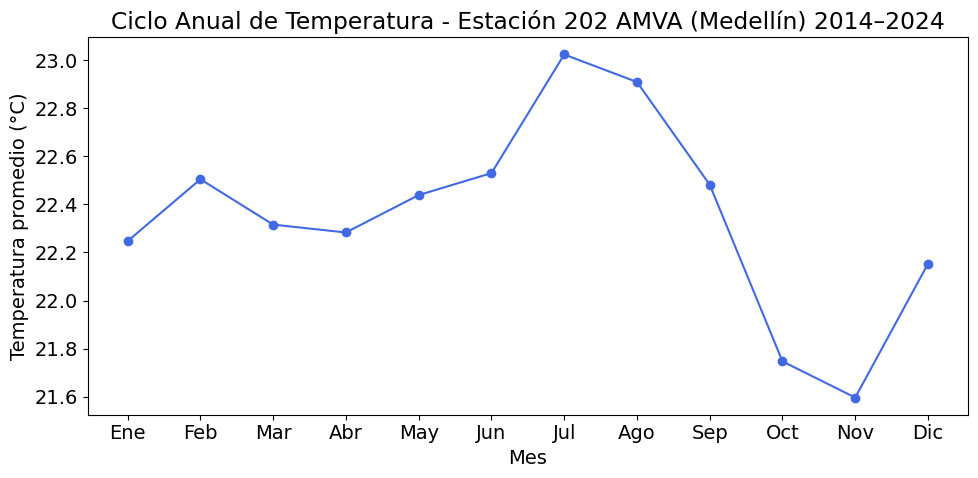

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df_202 = pd.read_csv("/content/drive/MyDrive/MAESTRÍA CIENCIA DE LOS DATOS Y ANALÍTICA/TRABAJO DE GRADO/DATOS/202_dataset_completo.csv")
df_202['latitud'] = 	6.242238
df_202['longitud'] = -75.574031

print(df_202.head())
print(df_202.tail())

df_clean_202 = df_202.drop_duplicates()
df_clean_202 = df_clean_202.dropna(subset=['temperatura', 'latitud', 'longitud'])
df_clean_202.to_csv("202_datos_meteorologicos_limpios.csv", index=False)

print("Archivo guardado como '202_datos_meteorologicos_limpios.csv'")

df_202 = pd.read_csv("202_datos_meteorologicos_limpios.csv")
df_202['fecha_hora'] = pd.to_datetime(df_202['fecha_hora'], errors='coerce')

df_202['codigo'] = 202
df_202['latitud'] = 6.242238
df_202['longitud'] = -75.574031


print(df_202.info())
print(df_202.describe())

df_202 = df_202[(df_202['temperatura'] > -10) & (df_202['temperatura'] < 50)]
df_202 = df_202[(df_202['calidad'] >= 1) & (df_202['calidad'] <= 100)]

import matplotlib.pyplot as plt

df_202['fecha_hora'] = pd.to_datetime(df_202['fecha_hora'], errors='coerce')
df_202['mes'] = df_202['fecha_hora'].dt.month

ciclo_mensual_202 = df_202.groupby('mes')['temperatura'].mean()

df_202['hora'] = df_202['fecha_hora'].dt.hour
ciclo_diurno_202 = df_202.groupby('hora')['temperatura'].mean()

plt.figure(figsize=(10, 5))
ciclo_mensual_202.plot(marker='o', color='royalblue')
plt.title("Ciclo Anual de Temperatura - Estación 202 AMVA (Medellín) 2014–2024")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(False)
plt.tight_layout()
plt.show()

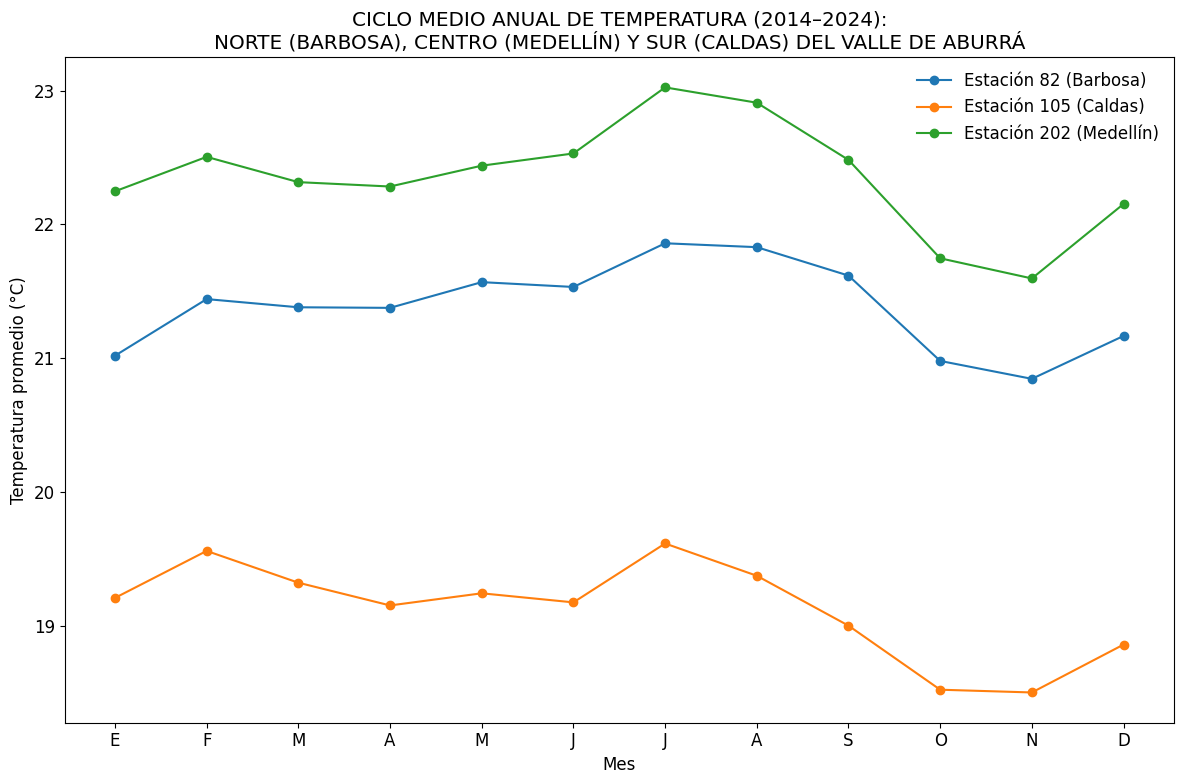

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

ciclo_mensual_82 = ciclo_mensual_82.reset_index()
ciclo_mensual_105 = ciclo_mensual_105.reset_index()
ciclo_mensual_202 = ciclo_mensual_202.reset_index()

ciclo_mensual_82 = ciclo_mensual_82.rename(columns={'temperatura': 'Temperatura_Estacion_82'})
ciclo_mensual_105 = ciclo_mensual_105.rename(columns={'temperatura': 'Temperatura_Estacion_105'})
ciclo_mensual_202 = ciclo_mensual_202.rename(columns={'temperatura': 'Temperatura_Estacion_202'})

ciclos_combinados = pd.merge(ciclo_mensual_82, ciclo_mensual_105, on='mes')
ciclos_combinados = pd.merge(ciclos_combinados, ciclo_mensual_202, on='mes')

plt.figure(figsize=(12, 8))

plt.plot(ciclos_combinados['mes'], ciclos_combinados['Temperatura_Estacion_82'], marker='o', label='Estación 82 (Barbosa)')
plt.plot(ciclos_combinados['mes'], ciclos_combinados['Temperatura_Estacion_105'], marker='o', label='Estación 105 (Caldas)')
plt.plot(ciclos_combinados['mes'], ciclos_combinados['Temperatura_Estacion_202'], marker='o', label='Estación 202 (Medellín)')

plt.title("CICLO MEDIO ANUAL DE TEMPERATURA (2014–2024):\nNORTE (BARBOSA), CENTRO (MEDELLÍN) Y SUR (CALDAS) DEL VALLE DE ABURRÁ")
plt.xlabel("Mes")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(ticks=range(1,13), labels=[
    'E', 'F', 'M', 'A', 'M', 'J',
    'J', 'A', 'S', 'O', 'N', 'D'
])
plt.grid(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

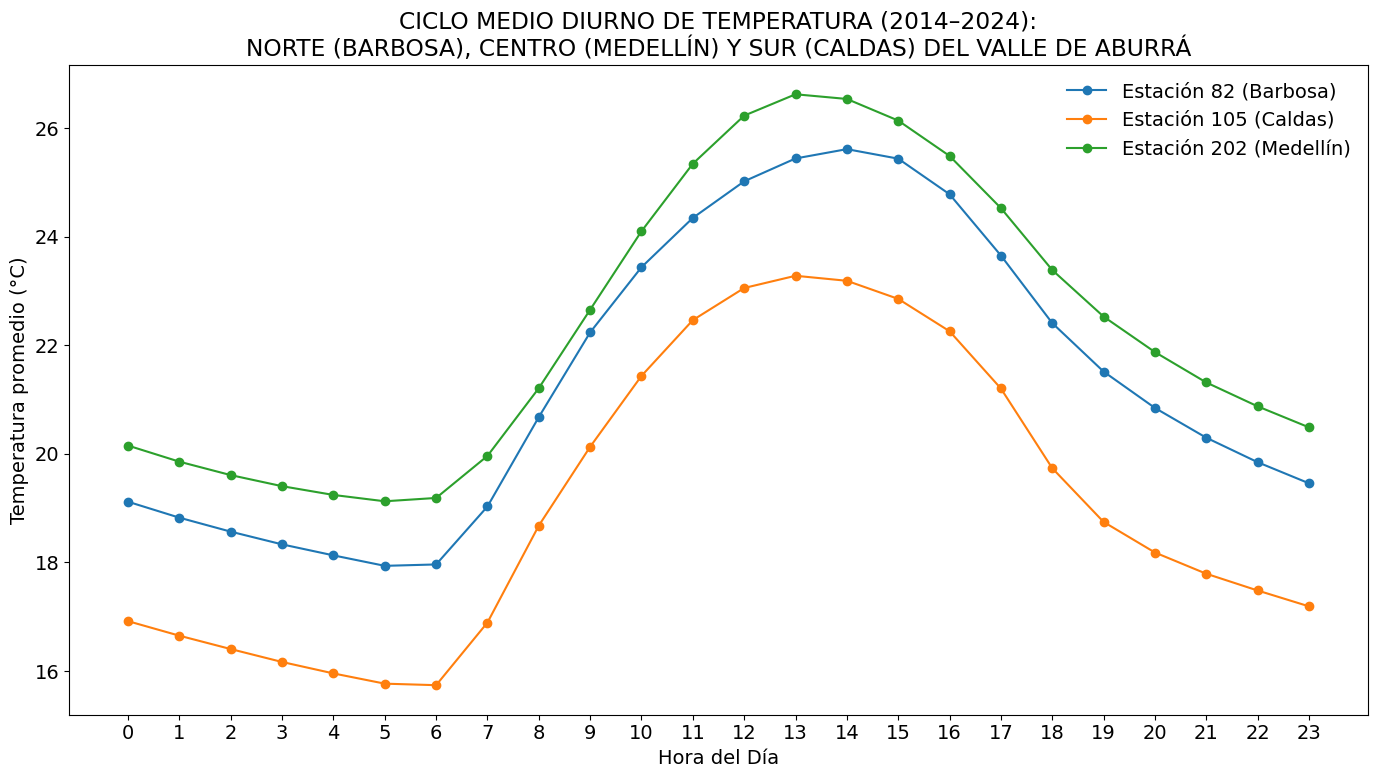

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

ciclo_diurno_82_df = ciclo_diurno_82.reset_index()
ciclo_diurno_105_df = ciclo_diurno_105.reset_index()
ciclo_diurno_202_df = ciclo_diurno_202.reset_index()

ciclo_diurno_82_df = ciclo_diurno_82_df.rename(columns={'temperatura': 'Temperatura_Estacion_82'})
ciclo_diurno_105_df = ciclo_diurno_105_df.rename(columns={'temperatura': 'Temperatura_Estacion_105'})
ciclo_diurno_202_df = ciclo_diurno_202_df.rename(columns={'temperatura': 'Temperatura_Estacion_202'})

ciclo_diurno_82_df = ciclo_diurno_82_df.rename(columns={'hora': 'Hora_del_Dia'})
ciclo_diurno_105_df = ciclo_diurno_105_df.rename(columns={'hora': 'Hora_del_Dia'})
ciclo_diurno_202_df = ciclo_diurno_202_df.rename(columns={'hora': 'Hora_del_Dia'})


ciclos_diurnos_combinados = pd.merge(ciclo_diurno_82_df, ciclo_diurno_105_df, on='Hora_del_Dia')
ciclos_diurnos_combinados = pd.merge(ciclos_diurnos_combinados, ciclo_diurno_202_df, on='Hora_del_Dia')

plt.figure(figsize=(14, 8))

plt.plot(ciclos_diurnos_combinados['Hora_del_Dia'], ciclos_diurnos_combinados['Temperatura_Estacion_82'], marker='o', label='Estación 82 (Barbosa)')
plt.plot(ciclos_diurnos_combinados['Hora_del_Dia'], ciclos_diurnos_combinados['Temperatura_Estacion_105'], marker='o', label='Estación 105 (Caldas)')
plt.plot(ciclos_diurnos_combinados['Hora_del_Dia'], ciclos_diurnos_combinados['Temperatura_Estacion_202'], marker='o', label='Estación 202 (Medellín)')

plt.title("CICLO MEDIO DIURNO DE TEMPERATURA (2014–2024):\nNORTE (BARBOSA), CENTRO (MEDELLÍN) Y SUR (CALDAS) DEL VALLE DE ABURRÁ")
plt.xlabel("Hora del Día")
plt.ylabel("Temperatura promedio (°C)")
plt.xticks(range(0,24))
plt.grid(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()